In [ ]:
#Problem 1 Summary Statistics
import pandas as pd

# Load the scatterplots dataset
scatterplots = pd.read_csv('scatterplots.csv')

# Display summary statistics
summary = scatterplots.describe()
print(summary)

Correlation between X1 and Y1: 0.8164205163448399
Correlation between X2 and Y2: 0.8162365060002427
Correlation between X3 and Y3: 0.8162867394895984
Correlation between X4 and Y4: 0.8165214368885028


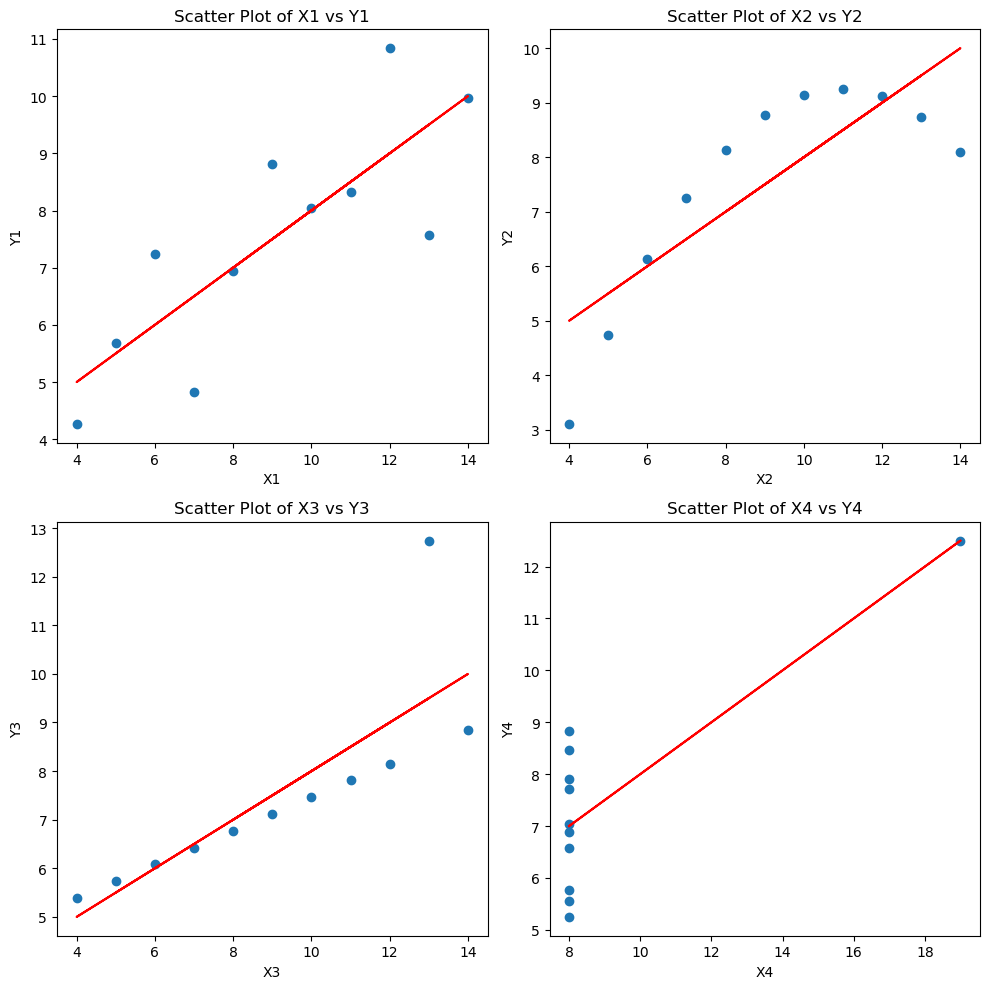

In [24]:
# Problem 1 Correlation and Scatter Plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the scatterplots dataset
scatterplots = pd.read_csv('scatterplots.csv')

# Assuming the pairs are (X1, Y1), (X2, Y2), (X3, Y3), (X4, Y4)
df1 = scatterplots[['X1', 'Y1']]
df2 = scatterplots[['X2', 'Y2']]
df3 = scatterplots[['X3', 'Y3']]
df4 = scatterplots[['X4', 'Y4']]

# Compute correlation for each DataFrame
corr_df1 = df1.corr().iloc[0, 1]
corr_df2 = df2.corr().iloc[0, 1]
corr_df3 = df3.corr().iloc[0, 1]
corr_df4 = df4.corr().iloc[0, 1]

print(f"Correlation between X1 and Y1: {corr_df1}")
print(f"Correlation between X2 and Y2: {corr_df2}")
print(f"Correlation between X3 and Y3: {corr_df3}")
print(f"Correlation between X4 and Y4: {corr_df4}")

# Function to plot scatter plot with regression line
def plot_scatter_with_regression(ax, x, y, title, xlabel, ylabel):
    ax.scatter(x, y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Fit the linear regression model
    model = LinearRegression()
    x_reshaped = x.values.reshape(-1, 1)
    model.fit(x_reshaped, y)
    y_pred = model.predict(x_reshaped)
    
    # Plot the regression line
    ax.plot(x, y_pred, color='red')

# Create scatter plots with regression lines
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plot_scatter_with_regression(axs[0, 0], df1['X1'], df1['Y1'], 'Scatter Plot of X1 vs Y1', 'X1', 'Y1')
plot_scatter_with_regression(axs[0, 1], df2['X2'], df2['Y2'], 'Scatter Plot of X2 vs Y2', 'X2', 'Y2')
plot_scatter_with_regression(axs[1, 0], df3['X3'], df3['Y3'], 'Scatter Plot of X3 vs Y3', 'X3', 'Y3')
plot_scatter_with_regression(axs[1, 1], df4['X4'], df4['Y4'], 'Scatter Plot of X4 vs Y4', 'X4', 'Y4')

plt.tight_layout()
plt.show()

In [25]:
#Problem 2: The cost of Popularity | summary statistics
import pandas as pd

# Load the scatterplots dataset
df_imdb = pd.read_csv('imdb_small.csv')

# Display summary statistics
summary = df_imdb.describe()
print(summary)

        Unnamed: 0  actor_1_facebook_likes         gross  \
count    25.000000               25.000000  2.500000e+01   
mean   1403.760000             6698.720000  5.086230e+07   
std     961.897443             6935.929579  5.045031e+07   
min      63.000000              596.000000  6.039430e+05   
25%     435.000000              939.000000  1.021465e+07   
50%    1372.000000             3000.000000  2.887119e+07   
75%    2250.000000            11000.000000  8.710000e+07   
max    2918.000000            23000.000000  1.773437e+08   

       num_user_for_reviews        budget  actor_2_facebook_likes  imdb_score  
count             25.000000  2.500000e+01               25.000000   25.000000  
mean             293.240000  5.163980e+07              941.520000    6.176000  
std              208.228896  5.086817e+07              712.590352    0.913911  
min               53.000000  5.000000e+05              194.000000    4.300000  
25%              154.000000  1.100000e+07              561.

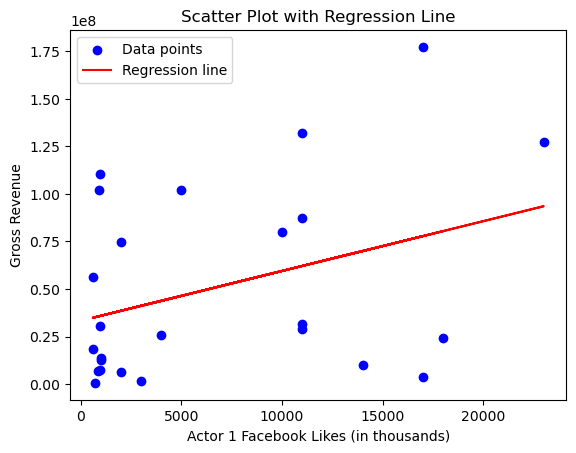


Intercept: 33316077.630204763
Coefficient: 2619.339146851224
Correlation: 0.3601078023420974


In [26]:
#Problem 2: The cost of Popularity | Solve

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset and create a DataFrame for correlation calculation
df_revenue_to_likes = pd.read_csv('imdb_small.csv')[['actor_1_facebook_likes', 'gross']]

# Extract relevant columns
x = df_revenue_to_likes['actor_1_facebook_likes']
y = df_revenue_to_likes['gross']

# Reshape x to a 2D array with one column
x_reshaped = x.values.reshape(-1, 1)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Predict y values using the model
y_pred = model.predict(x_reshaped)

# Plot the scatter plot
plt.scatter(x, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(x, y_pred, color='red', label='Regression line')

# Add labels and title
plt.xlabel('Actor 1 Facebook Likes (in thousands)')
plt.ylabel('Gross Revenue')
plt.title('Scatter Plot with Regression Line')
plt.legend()

# Show the plot
plt.show()

# Print the coefficients
print(f"\nIntercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Correlation: {df_revenue_to_likes.corr().iloc[0, 1]}")